In [ ]:
# All imports here

import pandas as pd
import numpy as np
from datetime import time, datetime
from tqdm import tqdm
import os
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from scipy import sparse
from scipy.sparse import csr_matrix

In [ ]:
# Define path for Train, Test CSV and Sparse matrix files

trainDataPath = "/content/drive/MyDrive/Netflix Movie recommendation/data/train.csv"
testDataPath = "/content/drive/MyDrive/Netflix Movie recommendation/data/test.csv"
trainSparseMatrixPath = "/content/drive/MyDrive/Netflix Movie recommendation/data/train_sparse.npz"
testSparseMatrixPath = "/content/drive/MyDrive/Netflix Movie recommendation/data/test_sparse.npz"

In [ ]:
# Read the Train data
trainData = pd.read_csv(trainDataPath)

In [ ]:
# Read the Test data
testData = pd.read_csv(testDataPath)

Text(0, 0.5, 'Count (in millions)')

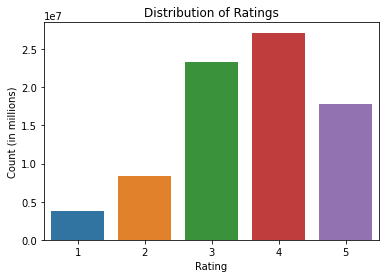

In [ ]:
# Plot the histogram for ratings
plt.title("Distribution of Ratings")
sns.countplot(x="rating", data=trainData)
plt.xlabel("Rating")
plt.ylabel("Count (in millions)")

Text(0, 0.5, 'Count (in millions)')

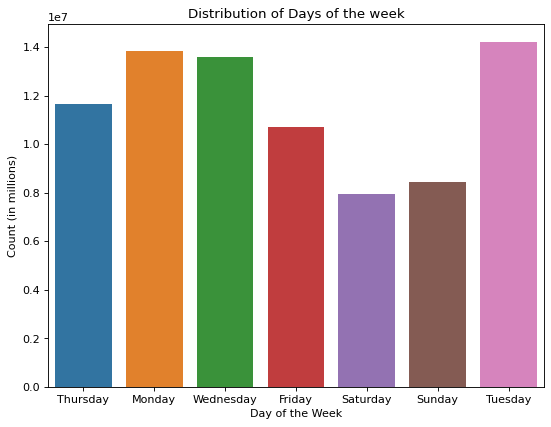

In [ ]:
# Plot the histogram for Day of the week
figure(figsize=(8, 6), dpi=80)
plt.title("Distribution of Days of the week")
sns.countplot(x="day_of_week", data=trainData)
plt.xlabel("Day of the Week")
plt.ylabel("Count (in millions)")

Text(0, 0.5, 'Number of ratings')

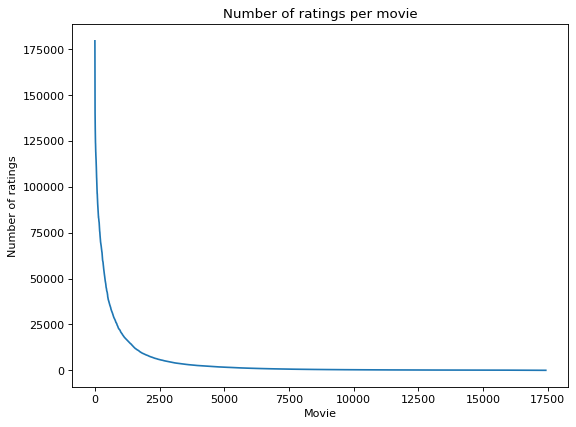

In [ ]:
# Number of ratings per movie

ratingsPerMovie = trainData.groupby(by="movie")["rating"].count().sort_values(ascending=False)

figure(figsize=(8, 6), dpi=80)
plt.plot(ratingsPerMovie.values)
plt.title("Number of ratings per movie")
plt.xlabel("Movie")
plt.ylabel("Number of ratings")

## Sparse Matrix

In [ ]:
# Helper method for creating sparse matrix 
def write_to_sparse_matrix(data, path):
  sparse_matrix = sparse.csr_matrix((data.rating.values, (data.user.values, data.movie.values)))
  sparse.save_npz(path, sparse_matrix)

In [ ]:
if not os.path.exists(trainSparseMatrixPath):
  write_to_sparse_matrix(trainData, trainSparseMatrixPath)

In [ ]:
if not os.path.exists(testSparseMatrixPath):
  write_to_sparse_matrix(testData, testSparseMatrixPath)

In [ ]:
trainSparse = sparse.load_npz(trainSparseMatrixPath)

In [ ]:
testSparse = sparse.load_npz(testSparseMatrixPath)

In [ ]:
print("Train Sparse Shape:", trainSparse.shape)
print("Test Sparse Shape:", testSparse.shape)

Train Sparse Shape: (2649430, 17771)
Test Sparse Shape: (2649430, 17771)
